<a href="https://colab.research.google.com/github/Alexnder77/DeepLearning--methods-and-applications/blob/main/Lab4_A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboration tal- och textigenkänning
#upg A



## Playing with pre-trained word embeddings

Download the pre-trained word vectors

In [ ]:
import numpy as np

In [ ]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
!wget -P /root/input/ -c "https://git.ri.se/tomas.nordstrom/mldata/-/raw/main/GoogleNews-vectors-negative300.bin.gz"

--2022-05-09 15:14:20--  https://git.ri.se/tomas.nordstrom/mldata/-/raw/main/GoogleNews-vectors-negative300.bin.gz
Resolving git.ri.se (git.ri.se)... 192.71.100.197
Connecting to git.ri.se (git.ri.se)|192.71.100.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  62.9MB/s    in 25s     

2022-05-09 15:14:46 (62.5 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



Install `gensim`, a useful NLP library that we will use to load w2v embeddings

In [ ]:
#!pip install gensim
#import gensim 
#from gensim.models import KeyedVectors

kod från https://www.canvas.umu.se/courses/6740/discussion_topics/109406?module_item_id=225396 

In [ ]:
!pip install gensim
import gensim 
from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz' # from above

In [ ]:
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [ ]:
word2vec["cat"].shape

(300,)

Recall that $\text{cos}(a,b) = \frac{a \cdot b}{||a|| \cdot  ||b||}$

In [ ]:
import numpy as np

def cos(x1, x2):
  return np.dot(x1, x2)/(np.linalg.norm(x1)*np.linalg.norm(x2))

In [ ]:
cos(word2vec["cat"], word2vec["dog"])

0.76094574

In [ ]:
cos(word2vec["cat"], word2vec["eggplant"])

0.11546826

In [ ]:
import random
vocab = random.sample(list(word2vec.vocab), 100)

In [ ]:
X = np.array([word2vec[v] for v in vocab])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


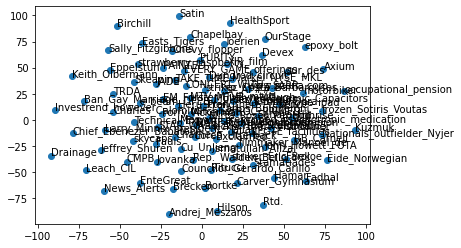

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)


Y = tsne.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(vocab, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [ ]:
word2vec.most_similar_cosmul(positive=['king', 'woman'], negative=['man'])

[('queen', 0.9314123392105103),
 ('monarch', 0.858533501625061),
 ('princess', 0.8476566076278687),
 ('Queen_Consort', 0.8150269985198975),
 ('queens', 0.8099815249443054),
 ('crown_prince', 0.808997631072998),
 ('royal_palace', 0.8027306795120239),
 ('monarchy', 0.801961362361908),
 ('prince', 0.800979733467102),
 ('empress', 0.7958388328552246)]

In [ ]:
word2vec.most_similar_cosmul(positive=['france', 'london'], negative=['paris'])

[('england', 0.9101188778877258),
 ('europe', 0.8848621249198914),
 ('birmingham', 0.8573064804077148),
 ('newcastle', 0.8572091460227966),
 ('european', 0.8561750054359436),
 ('glasgow', 0.8432874083518982),
 ('africa', 0.8426245450973511),
 ('sheffield', 0.8418411612510681),
 ('sunderland', 0.8398485779762268),
 ('america', 0.838864266872406)]

if you have france, add london and remove paris it seems pretty reasonable to be left with england

In [ ]:
word2vec.most_similar_cosmul(positive=['tower','france'])

[('Eiffel_tower', 0.4525476098060608),
 ('towers', 0.44458258152008057),
 ('manhattan', 0.44260358810424805),
 ('SolarReserve_molten_salt', 0.4397043287754059),
 ('responded_Understood_Atlasjet', 0.4396602511405945),
 ('Grand_Sablon', 0.4390380382537842),
 ('taj_mahal', 0.4346845746040344),
 ('Spiderman_climbs', 0.4340457618236542),
 ('belvedere', 0.4338812828063965),
 ('sheffield', 0.43191254138946533)]

a tower in france = eiffel tower

In [ ]:
word2vec.most_similar_cosmul(positive=['taj_mahal','france'], negative=['india'])

[('Vieux_Port', 0.8498114943504333),
 ('Porte_de_Clignancourt', 0.8423805832862854),
 ('mairie', 0.8390583395957947),
 ('le_petit', 0.8385680317878723),
 ('Grand_Sablon', 0.8316614627838135),
 ('château', 0.8313177227973938),
 ('Hôtel_de', 0.8310173153877258),
 ('Gironde_estuary', 0.8309012055397034),
 ('Est_ce', 0.8304162621498108),
 ('bistrot', 0.8280022740364075)]

the taj mahal of france is apparently vieux port

In [ ]:
word2vec.most_similar_cosmul(positive=['car', 'fly'])

[('airplane', 0.4899432361125946),
 ('plane', 0.48344433307647705),
 ('flying', 0.4709782898426056),
 ('cashier_Ashley_Woloszyn', 0.4660669267177582),
 ('vehicle', 0.4660492241382599),
 ('microlight_plane', 0.4652301073074341),
 ('Tri_Pacer', 0.4611828625202179),
 ('tail_dragger', 0.46067386865615845),
 ('Piper_Tomahawk', 0.4578968584537506),
 ('cars', 0.45536187291145325)]

a car that can fly is obviusly an airplane

In [ ]:
word2vec.most_similar_cosmul(positive=['sweden', 'asia'], negative=['europe'])

[('indonesia', 0.8287280797958374),
 ('ethiopia', 0.8057767152786255),
 ('kk', 0.7990483641624451),
 ('Wayang_Wayang', 0.7971457839012146),
 ('korea', 0.7944381237030029),
 ('korean', 0.7917598485946655),
 ('jakarta', 0.7910916805267334),
 ('singapore', 0.7902588248252869),
 ('nepal', 0.7875000238418579),
 ('Donderdag', 0.7861229777336121)]

In [ ]:
word2vec.most_similar_cosmul(positive=['Sweden', 'Eiffel_tower'], negative=['france'])

[('Stockholm', 0.8658682703971863),
 ('Treehotel', 0.860291600227356),
 ('Master_filmmaker_Ingmar', 0.8521875739097595),
 ('Neuschwanstein_castle', 0.8515422940254211),
 ('Liseberg', 0.8490065932273865),
 ('Bible_Illuminated', 0.8464257121086121),
 ('Gunder_Hagg', 0.8442612886428833),
 ('St._Basil_Cathedral', 0.8401596546173096),
 ('spokesman_Anders_Thornberg', 0.839536190032959),
 ('Finland', 0.8373129963874817)]